In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, make_scorer, ConfusionMatrixDisplay
import seaborn as sns
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
import plotly.graph_objects as go
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

**DATA PREPARATION**

In [ ]:
#Loading dataset

df = pd.read_csv('/content/loan_standardized_with_debt_to_income.csv')

loan_df = df.drop('loan_id', axis=1)
loan_df.head()

,no_of_dependents,cibil_score,education_Graduate,self_employed_Yes,loan_status_Approved,debt_to_income,asset_combined
0,2,1.032792,1,0,1,-0.441200,1.918096
1,0,-1.061051,0,1,0,-0.159370,-1.279072
2,3,-0.544840,1,0,0,-0.682810,2.294615
3,3,-0.771045,1,0,0,0.081424,1.543931
4,5,-1.264055,0,1,0,-0.782394,1.547079


In [ ]:
#Splitting

X = loan_df.drop(['loan_status_Approved'], axis=1)
y = loan_df['loan_status_Approved']

In [ ]:
#Setting up 5-fold cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)

**LOGISTIC REGRESSION**

*Developing base model*

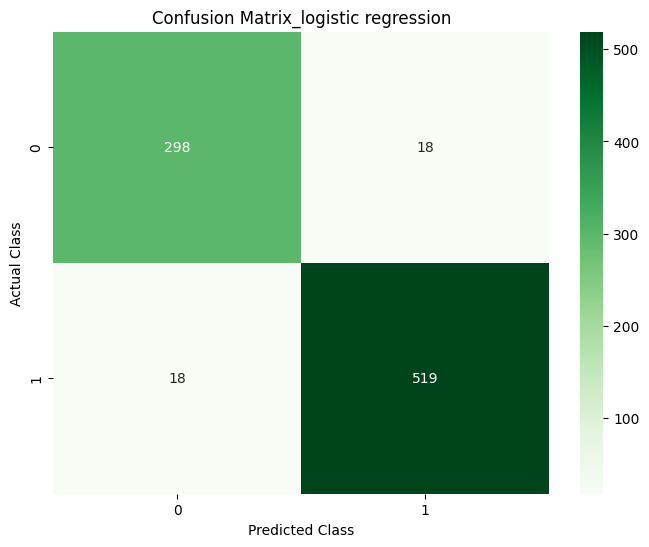

LOG Model Accuracy: 0.9577960140679953
LOG F1 Score (Macro): 0.9547592108054593
LOG F1 Score (Weighted): 0.9577960140679953


In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

labels = np.unique(y)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    log_reg.fit(X_train, y_train)

    log_y_pred = log_reg.predict(X_test)

    log_cm = confusion_matrix(y_test, log_y_pred)

    log_accuracy = accuracy_score(y_test, log_y_pred)
    log_f1 = f1_score(y_test, log_y_pred, average='macro')
    log_f1_weighted = f1_score(y_test, log_y_pred, average='weighted')


plt.figure(figsize=(8,6))
sns.heatmap(log_cm, annot=True, fmt="d", cmap='Greens', cbar=True)
plt.title('Confusion Matrix_logistic regression')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"LOG Model Accuracy: {log_accuracy}")
print(f"LOG F1 Score (Macro): {log_f1}")
print(f"LOG F1 Score (Weighted): {log_f1_weighted}")

*Optimizing model with L1/L2 regulation*

In [ ]:
#Optimization with L1 regularization
from sklearn.datasets import load_iris

model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print('Accuracy with L1 regularization:', accuracy_score(y_test, y_pred_l1))

Accuracy with L1 regularization: 0.9566236811254396


In [ ]:
#Optimization with L2 regularization
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print('Accuracy with L2 regularization:', accuracy_score(y_test, y_pred_l2))

Accuracy with L2 regularization: 0.9577960140679953


*Optimizing model with MLP*

In [ ]:
#Optimization with MLP
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', max_iter=1000, random_state=50)
model.fit(X_train, y_train)
y_pred_mlp = model.predict(X_test)
print('Accuracy with MLP:', accuracy_score(y_test, y_pred_mlp))

Accuracy with MLP: 0.9613130128956624


*Optimizing model with bagging*

In [ ]:
#Optimization with bagging
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(estimator=LogisticRegression(max_iter=200), n_estimators=10, random_state=50)
model.fit(X_train, y_train)
y_pred_bag = model.predict(X_test)
print('Accuracy with bagging:', accuracy_score(y_test, y_pred_bag))

Accuracy with bagging: 0.9542790152403282


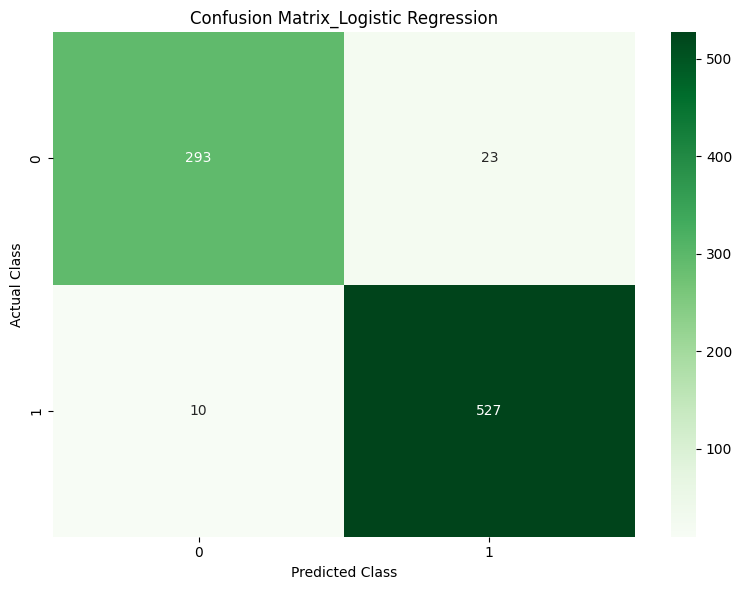

LOG Model Accuracy: 0.9613130128956624
LOG F1 Score (Macro): 0.9581647105682816
LOG F1 Score (Weighted): 0.961138107210808


In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    model = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', max_iter=1000, random_state=50)
    model.fit(X_train, y_train)
    y_pred_mlp = model.predict(X_test)

    log_cm = confusion_matrix(y_test, y_pred_mlp)

    log_accuracy = accuracy_score(y_test, y_pred_mlp)
    log_f1 = f1_score(y_test, y_pred_mlp, average='macro')
    log_f1_weighted = f1_score(y_test, y_pred_mlp, average='weighted')


plt.figure(figsize=(8,6))
sns.heatmap(log_cm, annot=True, fmt="d", cmap='Greens', cbar=True)
plt.title('Confusion Matrix_Logistic Regression')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
#plt.savefig(f"CM_Log.jpg", bbox_inches='tight')
plt.show()
plt.close()

print(f"LOG Model Accuracy: {log_accuracy}")
print(f"LOG F1 Score (Macro): {log_f1}")
print(f"LOG F1 Score (Weighted): {log_f1_weighted}")


In [ ]:
#Generate classification report on 11/24_Joan
report = classification_report(y_test, y_pred_mlp)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       316
           1       0.96      0.98      0.97       537

    accuracy                           0.96       853
   macro avg       0.96      0.95      0.96       853
weighted avg       0.96      0.96      0.96       853



**RANDOM FOREST**

*Developing base model*

In [ ]:
random_state_value = 50
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9953106682297772


*Hyper-parameters tunnning*

In [ ]:
#Hyperparameter Tuning (search RandomizedSearchCV to optimize the hyperparameters of a Random Forest  )
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=random_state_value)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5,random_state=random_state_value)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=50),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e54b3e5a350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e54b2781150>},
                   random_state=50)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 445}


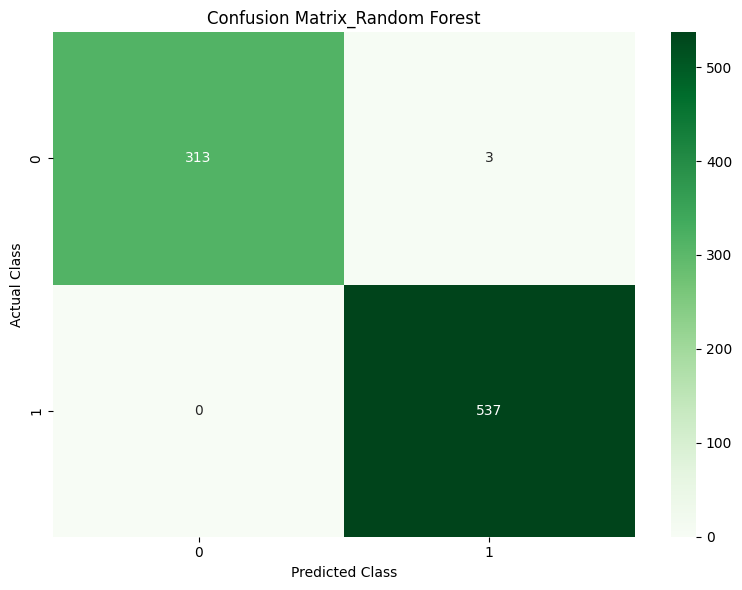

RF Model Accuracy: 0.9964830011723329
RF F1 Score (Macro): 0.9962225046609776
RF F1 Score (Weighted): 0.9964795123797701


In [ ]:
#Use the best hyperparameters to create a new Random Forest model
best_rf = RandomForestClassifier(max_depth=17, n_estimators=445, random_state=random_state_value)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

# Train the model on the entire training set
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Create the confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_best_rf)

rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
rf_f1 = f1_score(y_test, y_pred_best_rf, average='macro')
rf_f1_weighted = f1_score(y_test, y_pred_best_rf, average='weighted')


plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap='Greens', cbar=True)
plt.title('Confusion Matrix_Random Forest')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
#plt.savefig(f"CM_RF.jpg", bbox_inches='tight')
plt.show()
plt.close()

print(f"RF Model Accuracy: {rf_accuracy}")
print(f"RF F1 Score (Macro): {rf_f1}")
print(f"RF F1 Score (Weighted): {rf_f1_weighted}")

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_best_rf)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       316
           1       0.99      1.00      1.00       537

    accuracy                           1.00       853
   macro avg       1.00      1.00      1.00       853
weighted avg       1.00      1.00      1.00       853



In [ ]:
# Evaluate model stability with cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Random Forest:", cv_scores)
print("Mean Cross-Validation Accuracy for Random Forest:", cv_scores.mean())

Cross-Validation Scores for Random Forest: [0.99297424 0.98946136 0.99765808 0.99531616 0.99765533]
Mean Cross-Validation Accuracy for Random Forest: 0.9946130340360924


*Feature importance score*

Feature Importances:
               Feature  Importance
1         cibil_score    0.848034
4      debt_to_income    0.117785
5      asset_combined    0.024418
0    no_of_dependents    0.005892
3   self_employed_Yes    0.001952
2  education_Graduate    0.001920


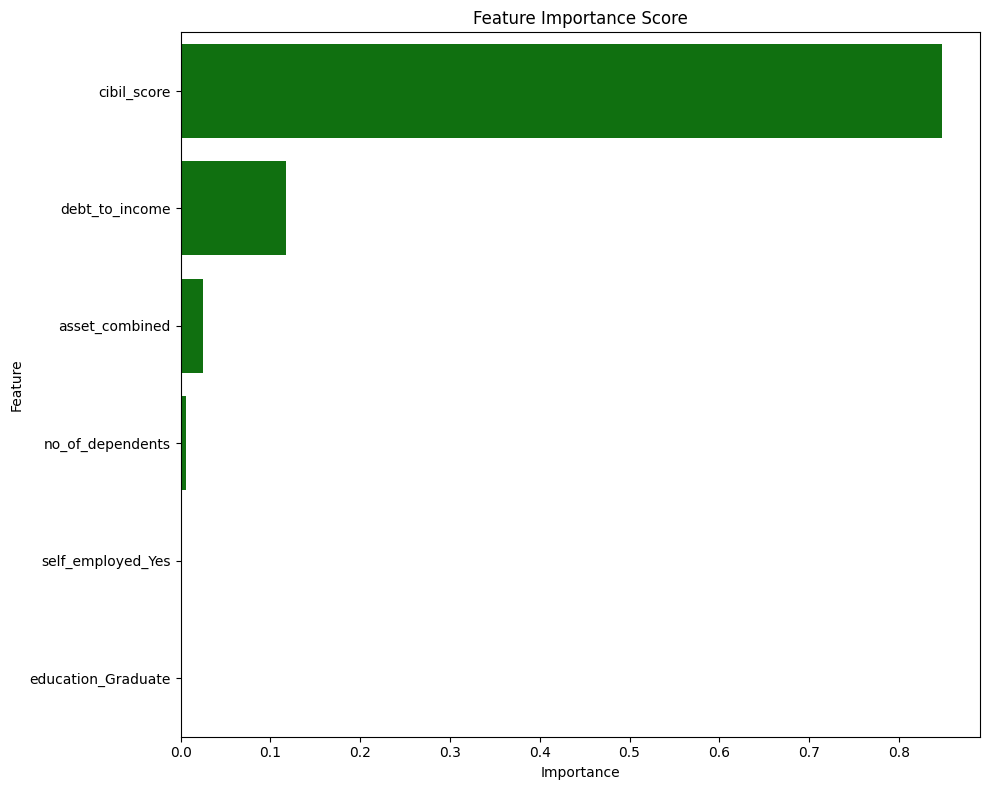

In [ ]:
# Get and sort feature importances
feature_importances = best_rf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the most important features
print("Feature Importances:\n", features_df)

# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, color='green')
plt.title('Feature Importance Score')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
#plt.savefig(f"FeatureImportanceRF.jpg", bbox_inches='tight')
plt.show()
plt.close()